In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
dia = load_diabetes()
print(dia.DESCR)

X = dia.data
y = dia.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [6]:
dfX = pd.DataFrame(X, columns = dia.feature_names)
dfy = pd.DataFrame(y, columns = ["progression"] )
df = pd.concat([dfX,dfy],axis =1)
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   

In [15]:
#Regression
reg = LinearRegression()
lasso_reg = Lasso(alpha = 5)
ridge_reg = Ridge(alpha = 5)

reg.fit(X,y)
lasso_reg.fit(X,y)
ridge_reg.fit(X,y)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
print('linear_Regression')
for a, b in zip(dia.feature_names, reg.coef_):
    print("%s: %f" %(a,b))

print("intercept:",reg.intercept_,"score:",reg.score(X,y))


linear_Regression
age: -10.012198
sex: -239.819089
bmi: 519.839787
bp: 324.390428
s1: -792.184162
s2: 476.745838
s3: 101.044570
s4: 177.064176
s5: 751.279321
s6: 67.625386
intercept: 152.1334841628965 score: 0.5177494254132934


In [17]:
# lasso_Regression
print('lasso_Regression')
for a, b in zip(dia.feature_names, lasso_reg.coef_):
    print("%s: %f" %(a,b))

print("intercept:",lasso_reg.intercept_,"score:",lasso_reg.score(X,y))

lasso_Regression
age: 0.000000
sex: 0.000000
bmi: 0.000000
bp: 0.000000
s1: 0.000000
s2: 0.000000
s3: -0.000000
s4: 0.000000
s5: 0.000000
s6: 0.000000
intercept: 152.13348416289594 score: 0.0


In [18]:
# ridge_regression
print('ridge_regression')
for a, b in zip(dia.feature_names, ridge_reg.coef_):
    print("%s: %f" %(a,b))

print("intercept:",ridge_reg.intercept_,"score:",ridge_reg.score(X,y))


ridge_regression
age: 28.273438
sex: -9.316605
bmi: 127.139552
bp: 90.643162
s1: 25.396307
s2: 14.038693
s3: -76.249206
s4: 73.175098
s5: 115.423085
s6: 68.406750
intercept: 152.13348416289605 score: 0.2786520923542041


In [19]:
# Diabetes progresion according to the ratio of s1
x_5 = dfX['s1']
x_5 = np.array(x_5).reshape(-1,1)
reg.fit(x_5,y)
lasso_reg.fit(x_5,y)
ridge_reg.fit(x_5,y)

reg.fit(x_5,y)
lasso_reg.fit(x_5,y)
ridge_reg.fit(x_5,y)

predict_reg = reg.predict(x_5)
predict_lasso = lasso_reg.predict(x_5)
predict_ridge = ridge_reg.predict(x_5)

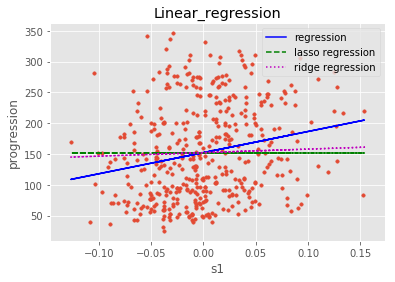

In [20]:
#linear regression plot

plt.style.use('ggplot')

plt.title('Linear_regression')
plt.scatter(x_5,y,s =12)
plt.plot(x_5,predict_reg,color='b',linestyle='-',label = 'regression')
plt.plot(x_5,predict_lasso,color='g',linestyle = '--', label= 'lasso regression')
plt.plot(x_5,predict_ridge,color='m',linestyle = ':', label = 'ridge regression')
plt.xlabel('s1')
plt.ylabel('progression')
plt.legend() 
plt.show()

In [1]:
# s1(T-cell의 변화된 정도)에 따른 당뇨의 연간 progression 데이터를 linear regression한 결과이다
# 기본 regression을 한 결과, regression의 평가도에 해당하는 score가 약 0.52
# lasso regression의 경우 score 가 0
# ridge regression의 경우 score가 0.28이 나오는 것을 볼수 있다.
# lasso regression의 경우는 alpha값이 너무 커서 underfitting된 경우라 볼 수 있다.
# ridge regression의 기준으로 보면, s1의 변화에 따른 연간 당뇨병의 pregression은 큰 관계성이 나타나지 않는다는 것을 볼 수 있다.